In [45]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as mes

### 绘制结果

In [46]:
def draw_result(x1, x2, y, name, fig, subplot = 111):
    now = fig.add_subplot(subplot)
    
    centers = []
    out = []
    normal = []
    for i in range(y.size):
        if y[i] == i:
            centers.append(i)
        elif y[i] == -1:
            out.append(i)
        else:
            normal.append(i)

    now.set_title(name)
    now.scatter(x1[normal], x2[normal], c=y[normal], cmap=plt.cm.Spectral, s=5)
    now.scatter(x1[centers], x2[centers], c="black", marker="+")
    now.scatter(x1[out], x2[out], c="red", marker="x", s=12)
    
    

### 结果评估

In [47]:
# sklearn版本不对，直接自己写了
def DBI(X, y):
    # 区分中心
    centers = []
    for i in range(y.size):
        if y[i] == i:
            centers.append(i)
    classes = np.size(centers)
    
    # 归类
    a = []
    for i in centers:
        a.append([i])
    for i in range(y.size):
        if y[i] >= 0 and y[i] != i:
            for t in range(classes):
                if y[i] == centers[t]:
                    a[t].append(i)
    
    # 计算S
    s = np.zeros(classes)
    for t in range(classes):
        c = X[a[t][0]]
        for i in a[t]:
            s[t] += np.sum((X[i] - c) ** 2)
        s[t] = np.sqrt(s[t] / np.size(a[t]))

    # 计算M
    m = np.zeros([classes, classes])
    for i in range(classes):
        for j in range(classes):
            m[i][j] = np.sum((X[a[i][0]] - X[a[j][0]]) ** 2) ** 0.5

    #计算R
    r = np.zeros(classes)
    for i in range(classes):
        for j in range(classes):
            if i != j:
                t = s[i] + s[j] / m[i][j]
                if t > r[i]:
                    r[i] = t

    return np.average(r)

### 进行聚类

In [48]:
def partition(path, dc = .01, dth = 10, rth = 5, dis = "l2"):
    
    X = np.loadtxt(path, delimiter=" ")
    N = np.size(X, 0)

    # 归一化
    x1 = X.T[0] / np.max(X.T[0])
    x2 = X.T[1] / np.max(X.T[1])
    X = np.c_[x1, x2]
    
    # 预计算距离方阵
    d = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            if (dis == "l2"):
                d[i][j] = (X[i][0] - X[j][0])**2 + (X[i][1]-X[j][1])**2
            elif (dis == "l1"):
                d[i][j] = abs(X[i][0] - X[j][0]) + abs(X[i][1] - X[j][1])
            else:
                d[i][j] = max(abs(X[i][0] - X[j][0]), abs(X[i][1] - X[j][1]))

    # 计算rho与delta
    rho = np.sum(d < dc, 1)
    mr = np.max(rho)

    delta = np.zeros(N) + 2
    argd = np.zeros(N, dtype="int32") - 1
    for i in range(N):
        if (rho[i] == mr):
            delta[i] = np.max(d[i])
        else:
            for j in range(N):
                if (rho[j] > rho[i]):
                    if (d[i][j] < delta[i]):
                        delta[i] = d[i][j]
                        argd[i] = j

    md = np.max(delta)
    
    # 备选中心与最终确定
    centers = []
    y = np.zeros(N, dtype="int32") - 3
    for i in range(N):
        if delta[i] > dth:
            if rho[i] > rth:
                centers.append(i)
                y[i] = i
            else:
                y[i] = -1

    for t in centers:
        for i in range(N):
            if d[i][t] < dc:
                y[i] = y[t]

    for i in range(N):
        if y[i] == -3:
            temp = []
            j = i
            while y[j] == -3:
                temp.append(j)
                j = argd[j]
            for t in temp:
                y[t] = y[j]
            
    fig = plt.figure(figsize=(10,4))
    draw_result(rho, delta, y, "decision [delta-rho]", fig, 121)
    draw_result(X.T[0], X.T[1], y, "partition", fig, 122)
    plt.show()
    return DBI(X, y)

### 测试

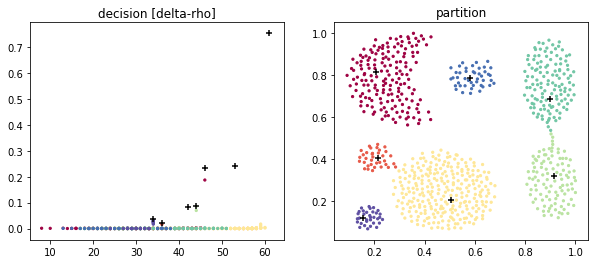

DBI: 0.44645219851244133


In [49]:
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)

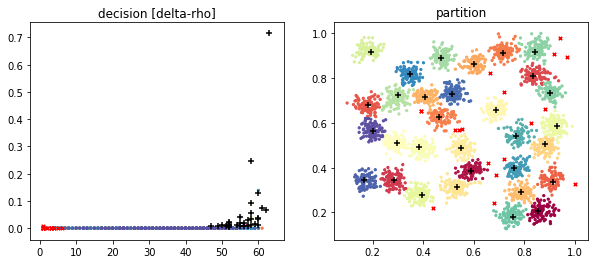

DBI: 0.3685431762108976


In [50]:
res = partition("Datasets/D31.txt", dc = 1e-3, dth=8e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)

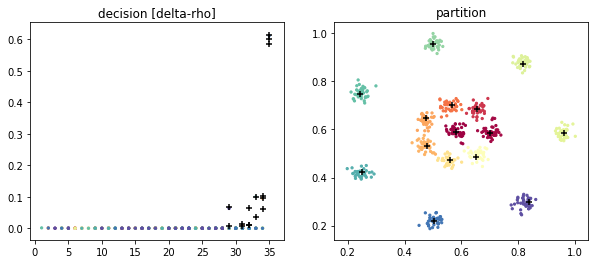

DBI: 0.3685431762108976


In [51]:
partition("Datasets/R15.txt", dc = 1e-3, dth=1.5e-3, rth=25, dis="l2")
print("DBI: ", end="")
print(res)

### 参数对比

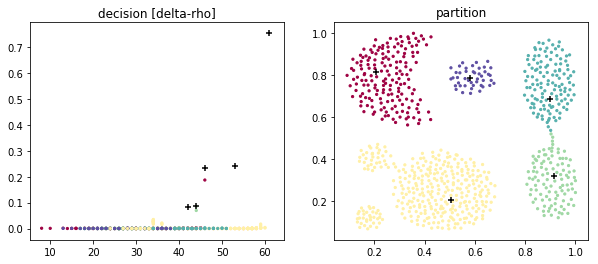

DBI: 0.4944046731091635


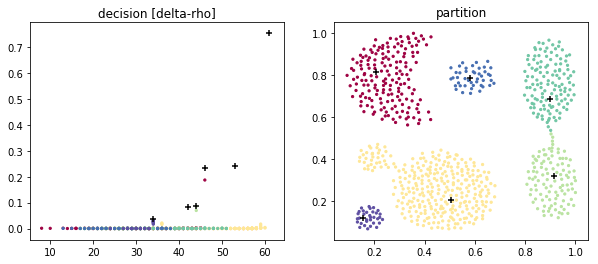

DBI: 0.4854899748003982


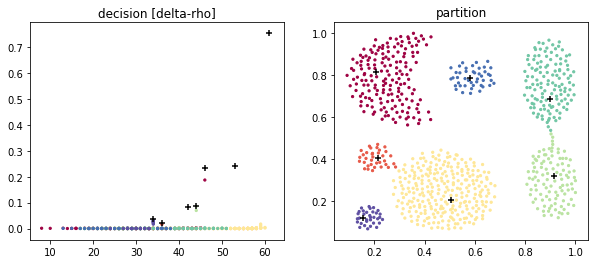

DBI: 0.44645219851244133


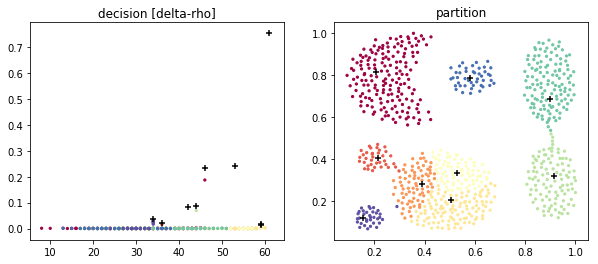

DBI: 0.5759542595762359


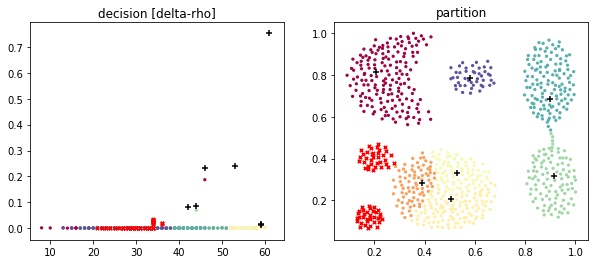

DBI: 0.6241937277223392


In [52]:
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.04, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.03, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.01, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.01, rth=40, dis="l2")
print("DBI: ", end="")
print(res)

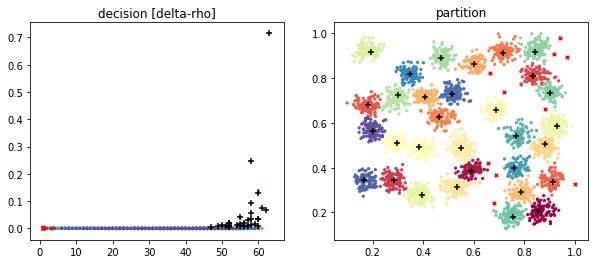

DBI: 0.3692622312189028


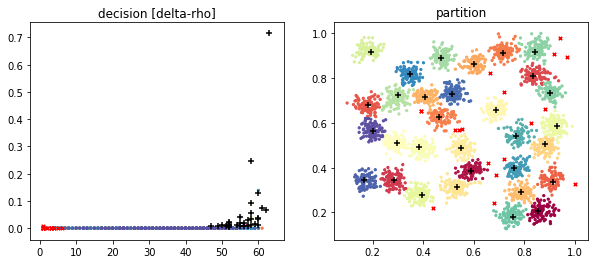

DBI: 0.3685431762108976


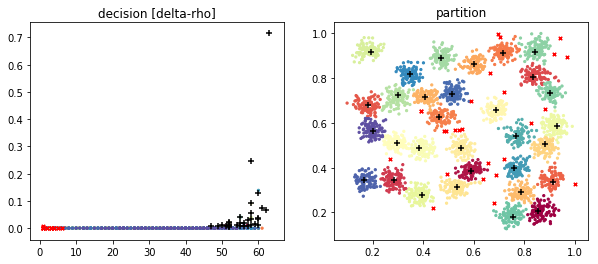

DBI: 0.3668355261755209


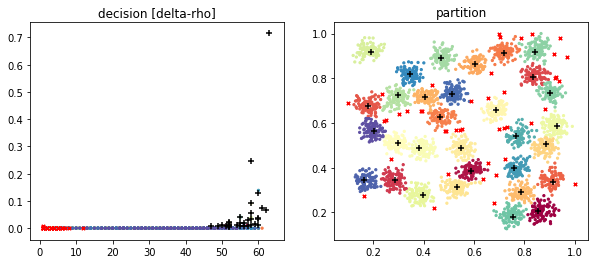

DBI: 0.36203017721959535


In [53]:
res = partition("Datasets/D31.txt", dc = 1e-3, dth=9e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/D31.txt", dc = 1e-3, dth=8e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/D31.txt", dc = 1e-3, dth=7e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/D31.txt", dc = 1e-3, dth=6e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)

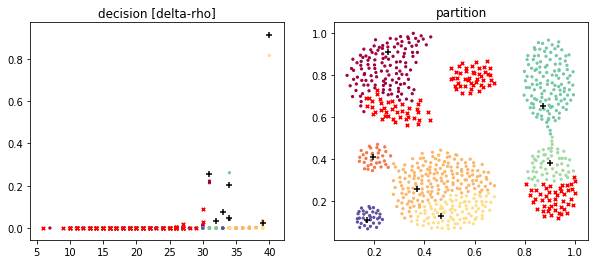

DBI: 0.6818976314190139


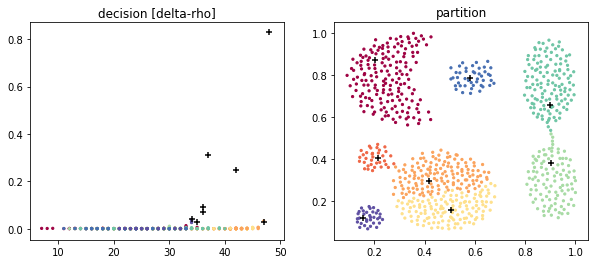

DBI: 0.6209076961620006


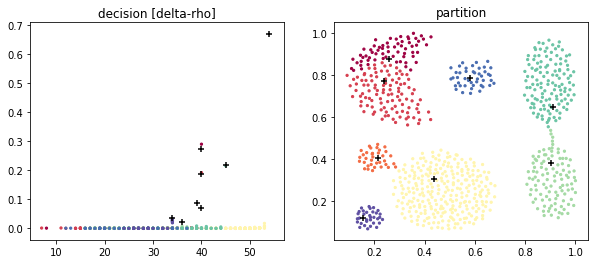

DBI: 0.7426447012828161


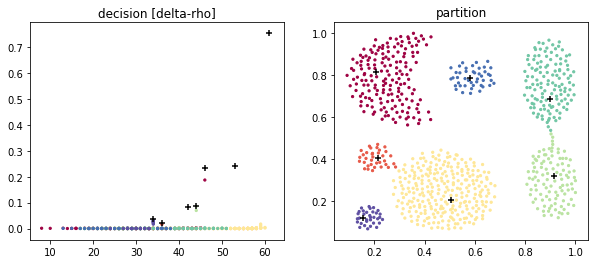

DBI: 0.44645219851244133


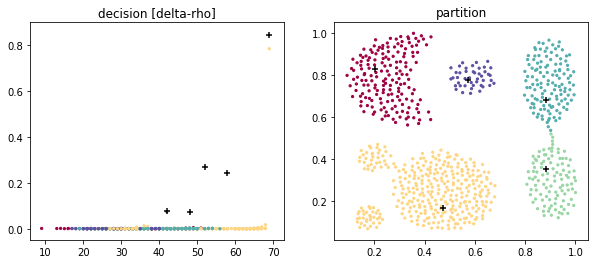

DBI: 0.5089497923580657


In [54]:
res = partition("Datasets/Aggregation.txt", dc = 5e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 6e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 7e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 8e-3, dth=.02, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/Aggregation.txt", dc = 9e-3, dth=.02, rth=40, dis="l2")
print("DBI: ", end="")
print(res)

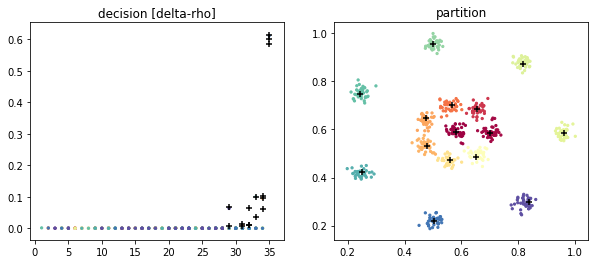

DBI: 0.2189437236426546


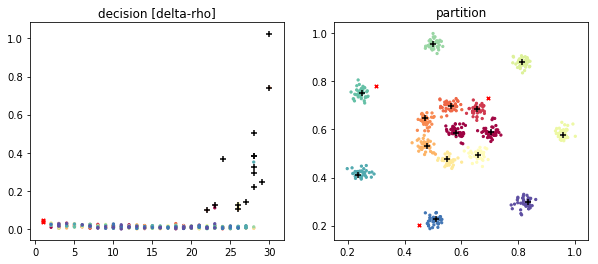

DBI: 0.21123144444324513


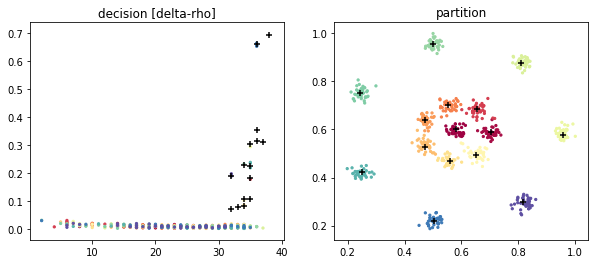

DBI: 0.21721946705468437


In [55]:
res = partition("Datasets/R15.txt", dc = 1e-3, dth=1.5e-3, rth=25, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/R15.txt", dc = np.sqrt(1e-3), dth=np.sqrt(1e-3), rth=20, dis="l1")
print("DBI: ", end="")
print(res)
res = partition("Datasets/R15.txt", dc = np.sqrt(1e-3), dth=np.sqrt(1e-3), rth=25, dis="li")
print("DBI: ", end="")
print(res)

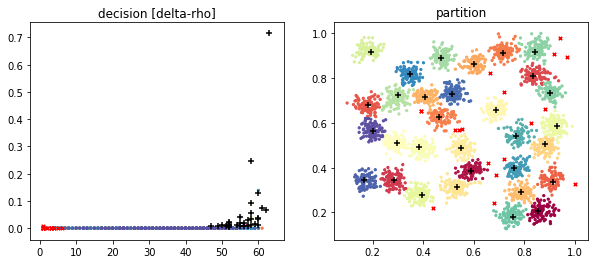

DBI: 0.3685431762108976


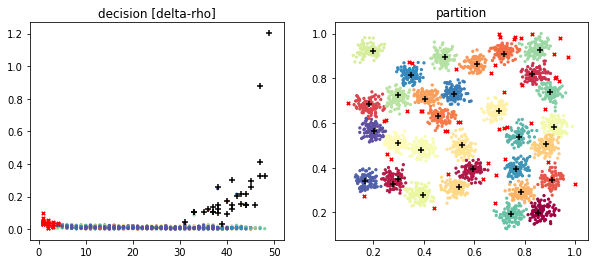

DBI: 0.40426799895621357


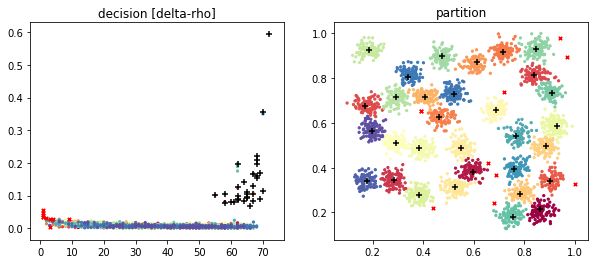

DBI: 0.35989134327174827


In [56]:
res = partition("Datasets/D31.txt", dc = 1e-3, dth=8e-4, rth=30, dis="l2")
print("DBI: ", end="")
print(res)
res = partition("Datasets/D31.txt", dc = np.sqrt(1e-3), dth=np.sqrt(8e-4), rth=30, dis="l1")
print("DBI: ", end="")
print(res)
res = partition("Datasets/D31.txt", dc = np.sqrt(1e-3), dth=np.sqrt(8e-4), rth=30, dis="li")
print("DBI: ", end="")
print(res)